In [3]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [4]:
#Importing the training dataset
globalHealthDataFrame= pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv',
            delimiter=',')

In [5]:
#Removing ID column from the daraframe
modified_globalHealthDataFrame = globalHealthDataFrame.drop(['ID'], axis=1)

In [6]:
globalHealthDataFrame.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


In [29]:
modified_globalHealthDataFrame.describe()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,...,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000,2071.0000
mean,69.2745,95.3602,2009.5186,0.1854,162.8339,161.9083,163.7595,33.0797,4.6964,764.5402,...,82.7272,5.8839,82.7533,1.6329,7352.7423,12037414.3394,4.9413,4.9773,0.6096,3.3725
std,9.4823,54.8616,4.6141,0.3887,118.8722,119.4422,118.8003,135.8329,4.2059,2081.8804,...,23.1888,2.5550,23.1310,4.7823,15219.9787,63917966.2517,4.6978,4.7855,0.2165,0.5908
min,37.3000,0.0000,2002.0000,0.0000,1.0000,0.0000,2.0000,0.0000,0.0100,0.0000,...,3.0000,0.3700,2.0000,0.1000,1.8800,34.0000,0.1000,0.1000,0.0000,0.0000
25%,63.0000,50.0000,2006.0000,0.0000,74.0000,74.0000,74.0000,0.0000,0.6150,5.8485,...,77.0000,4.1900,78.0000,0.1000,413.7300,127445.0000,1.6000,1.5000,0.4630,3.0659
50%,71.2000,94.0000,2010.0000,0.0000,144.0000,142.0000,144.0000,3.0000,3.8300,69.0204,...,93.0000,5.6400,93.0000,0.1000,1410.6700,652231.0000,3.2000,3.3000,0.6550,3.4496
75%,76.0000,144.0000,2014.0000,0.0000,228.0000,228.0000,230.0000,22.0000,7.8400,430.1900,...,97.0000,7.4300,97.0000,0.8000,5811.2950,5371104.0000,7.4000,7.4000,0.7695,3.7417
max,92.7000,192.0000,2017.0000,1.0000,699.0000,704.0000,722.0000,1800.0000,17.8700,19479.9116,...,99.0000,17.6000,99.0000,50.6000,133473.4700,1293859294.0000,27.7000,28.6000,0.9480,4.3818


In [8]:
#Supress value output in scientific notation
pd.options.display.float_format = '{:.4f}'.format

In [9]:
#Compute maximum value in each column
pd.DataFrame.max(modified_globalHealthDataFrame)

TARGET_LifeExpectancy                  92.7000
Country                               192.0000
Year                                 2017.0000
Status                                  1.0000
AdultMortality                        699.0000
AdultMortality-Male                   704.0000
AdultMortality-Female                 722.0000
InfantDeaths                         1800.0000
Alcohol                                17.8700
PercentageExpenditure               19479.9116
Measles                            212183.0000
BMI                                    87.3000
UnderFiveDeaths                      2500.0000
Polio                                  99.0000
TotalExpenditure                       17.6000
Diphtheria                             99.0000
HIV-AIDS                               50.6000
GDP                                133473.4700
Population                     1293859294.0000
Thinness1-19years                      27.7000
Thinness5-9years                       28.6000
IncomeComposi

<Figure size 432x288 with 0 Axes>

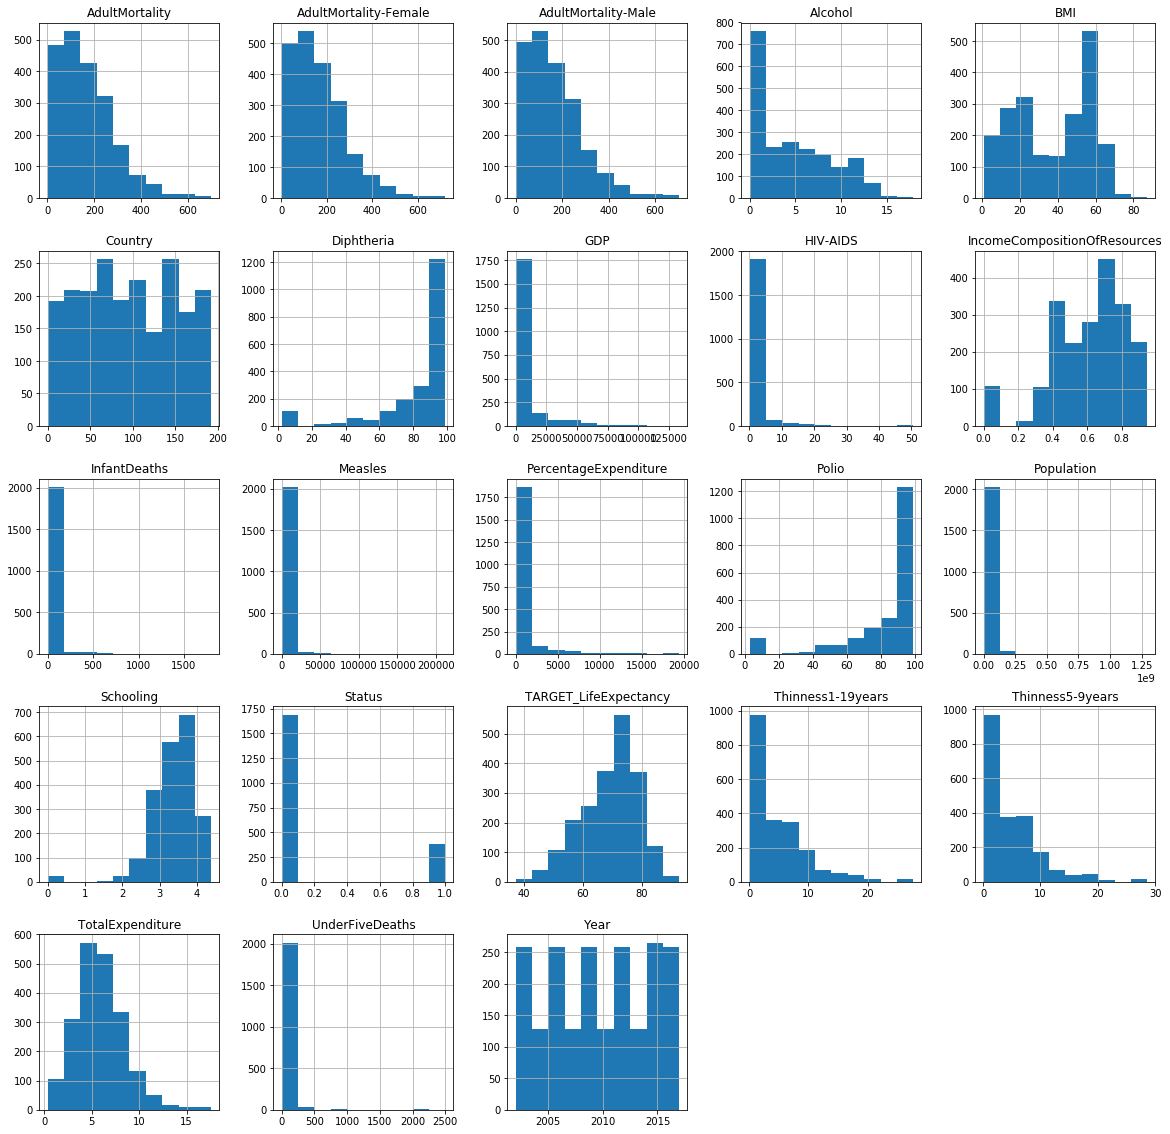

In [10]:
plt.figure()
modified_globalHealthDataFrame.hist(figsize=(20,20))
plt.show()

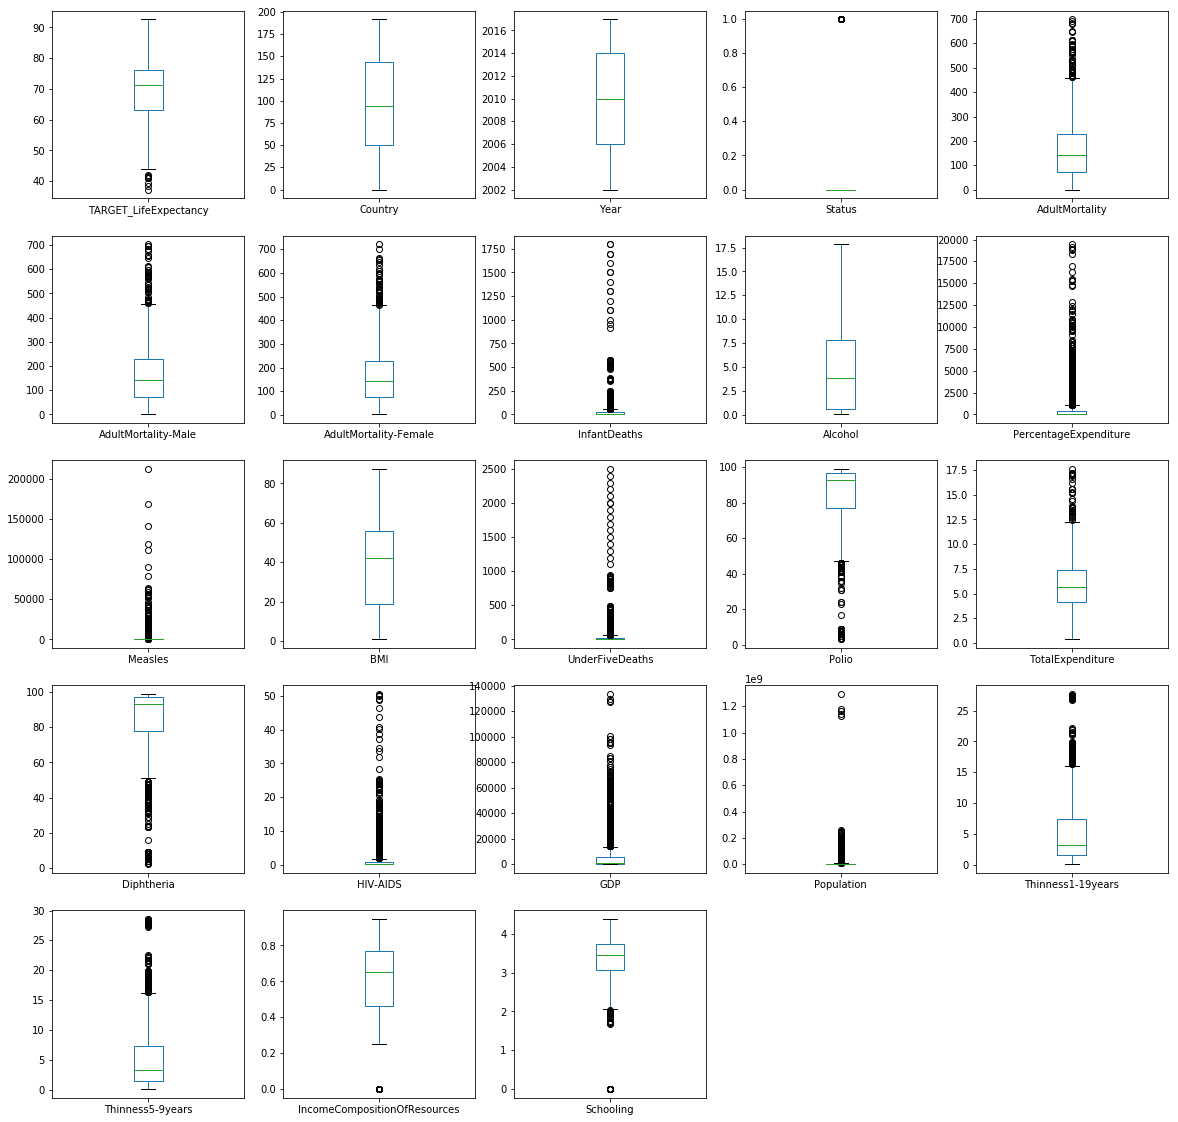

In [16]:
modified_globalHealthDataFrame.plot(kind='box', subplots=True, layout=(5,5),
sharex=False, sharey=False, figsize=(20,20))
plt.show()

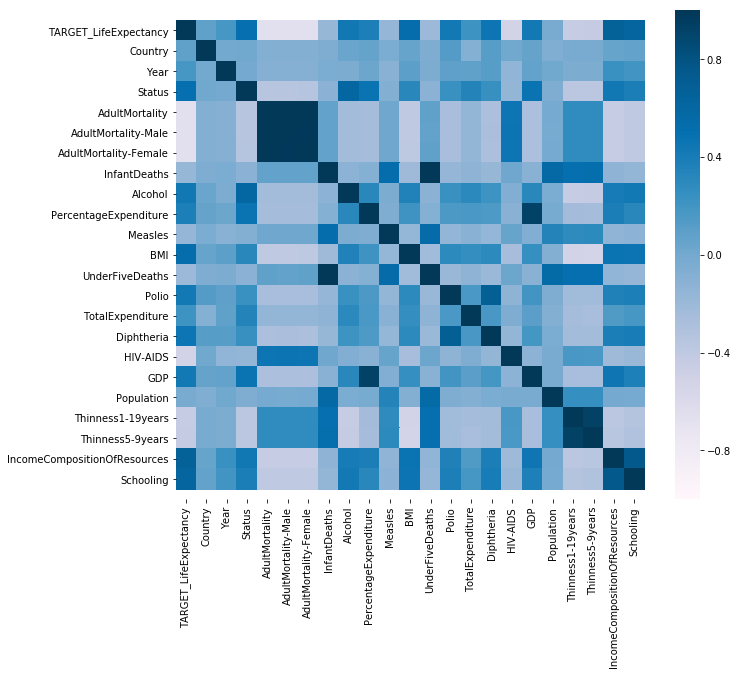

In [12]:
import seaborn as sns
correlations = modified_globalHealthDataFrame.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [21]:
modified_globalHealthDataFrame.columns

Index(['TARGET_LifeExpectancy', 'Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

Text(0, 0.5, 'Life Expectancy')

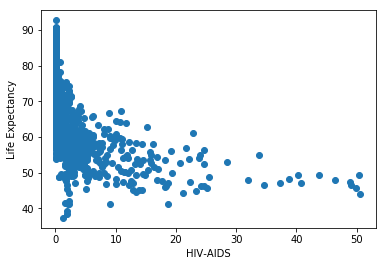

In [25]:
plt.scatter(modified_globalHealthDataFrame['HIV-AIDS'], modified_globalHealthDataFrame['TARGET_LifeExpectancy'])
plt.xlabel('HIV-AIDS')
plt.ylabel('Life Expectancy')

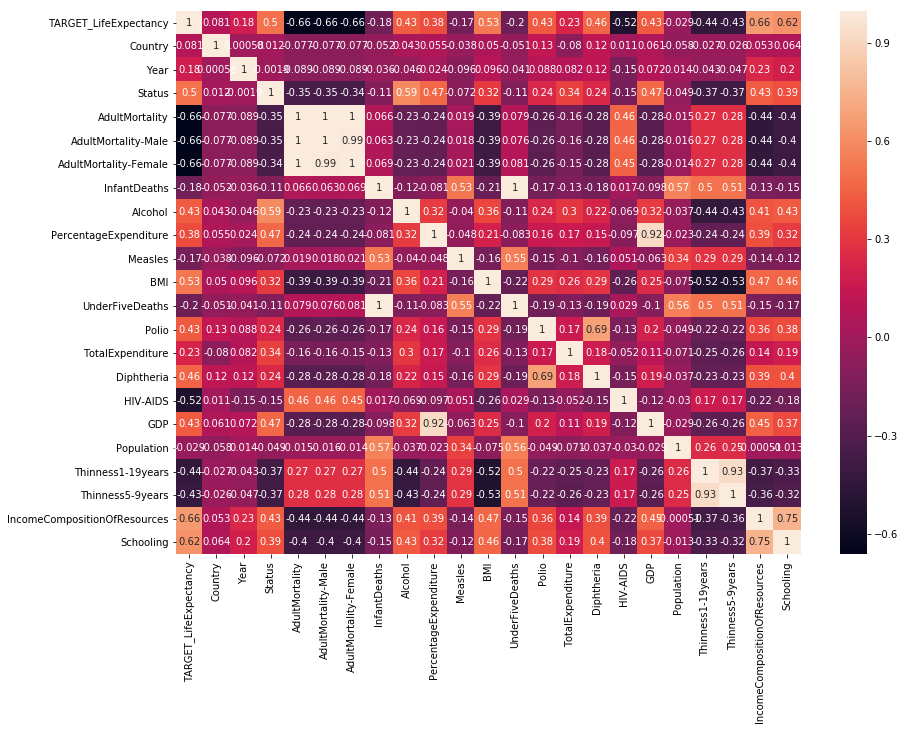

In [26]:
plt.figure(figsize = (14, 10))
sns.heatmap(modified_globalHealthDataFrame.corr(), annot = True)

In [27]:
modified_globalHealthDataFrame.isnull().head()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
pd.isna(modified_globalHealthDataFrame).sum()

TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
UnderFiveDeaths                 0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64